In [44]:
#Dependcies 

from sklearn import *
from sklearn.model_selection import GroupKFold
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



In [45]:
# Read The Datasets 

df1=pd.read_csv("TeamBatMLB2006-2022.csv")
df1

,Tm,#Bat,BatAge,R/G,G,PA,AB,Runs Scored,H,2B,...,LOB,PLAYOFFS,UBB,wOBA,Runs Allowed,Py_Win%,W,L,W-L%,YEAR
0,Arizona Diamondbacks,45,29.6,4.77,162,6330,5645,773,1506,331,...,1166,0,457,0.329642,788,0.490392,76,86,0.469000,2006
1,Atlanta Braves,45,27.4,5.24,162,6284,5583,849,1510,312,...,1105,0,478,0.343888,805,0.526583,79,83,0.488000,2006
2,Baltimore Orioles,46,30.4,4.74,162,6240,5610,768,1556,288,...,1177,0,439,0.334706,899,0.421898,70,92,0.432000,2006
3,Boston Red Sox,53,30.4,5.06,162,6435,5619,820,1510,327,...,1301,0,616,0.343672,825,0.496961,86,76,0.531000,2006
4,Chicago Cubs,46,28.6,4.42,162,6147,5587,716,1496,271,...,1082,0,371,0.323917,834,0.424310,66,96,0.407000,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,St. Louis Cardinals,51,28.5,4.36,162,6001,5351,706,1303,261,...,1081,1,446,0.317893,672,0.524658,90,72,0.555556,2021
506,Tampa Bay Rays,61,27.7,5.29,162,6213,5507,857,1336,288,...,1085,1,558,0.328624,651,0.634102,100,62,0.617284,2021
507,Texas Rangers,54,26.8,3.86,162,5943,5405,625,1254,225,...,1007,0,423,0.296566,815,0.370313,60,102,0.370370,2021
508,Toronto Blue Jays,62,26.8,5.22,162,6070,5476,846,1455,285,...,1056,0,482,0.347296,663,0.619515,91,71,0.561728,2021


In [46]:
df1["Run_Diff"]=df1["Runs Scored"]-df1["Runs Allowed"]
df1

,Tm,#Bat,BatAge,R/G,G,PA,AB,Runs Scored,H,2B,...,PLAYOFFS,UBB,wOBA,Runs Allowed,Py_Win%,W,L,W-L%,YEAR,Run_Diff
0,Arizona Diamondbacks,45,29.6,4.77,162,6330,5645,773,1506,331,...,0,457,0.329642,788,0.490392,76,86,0.469000,2006,-15
1,Atlanta Braves,45,27.4,5.24,162,6284,5583,849,1510,312,...,0,478,0.343888,805,0.526583,79,83,0.488000,2006,44
2,Baltimore Orioles,46,30.4,4.74,162,6240,5610,768,1556,288,...,0,439,0.334706,899,0.421898,70,92,0.432000,2006,-131
3,Boston Red Sox,53,30.4,5.06,162,6435,5619,820,1510,327,...,0,616,0.343672,825,0.496961,86,76,0.531000,2006,-5
4,Chicago Cubs,46,28.6,4.42,162,6147,5587,716,1496,271,...,0,371,0.323917,834,0.424310,66,96,0.407000,2006,-118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,St. Louis Cardinals,51,28.5,4.36,162,6001,5351,706,1303,261,...,1,446,0.317893,672,0.524658,90,72,0.555556,2021,34
506,Tampa Bay Rays,61,27.7,5.29,162,6213,5507,857,1336,288,...,1,558,0.328624,651,0.634102,100,62,0.617284,2021,206
507,Texas Rangers,54,26.8,3.86,162,5943,5405,625,1254,225,...,0,423,0.296566,815,0.370313,60,102,0.370370,2021,-190
508,Toronto Blue Jays,62,26.8,5.22,162,6070,5476,846,1455,285,...,0,482,0.347296,663,0.619515,91,71,0.561728,2021,183


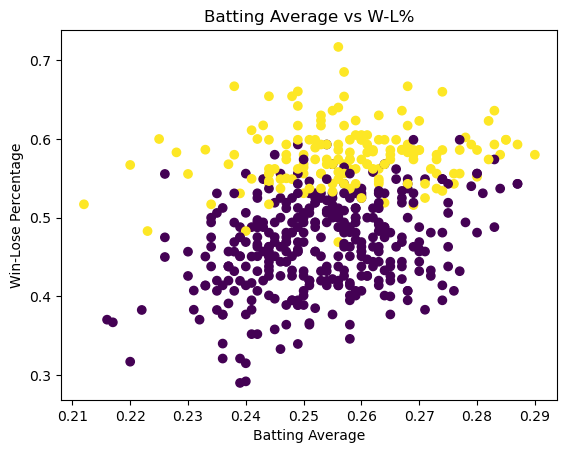

In [47]:
#Different Scatter Plots

plt.scatter(df1["BA"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("Batting Average")
plt.ylabel("Win-Lose Percentage")
plt.title("Batting Average vs W-L%")
plt.show()

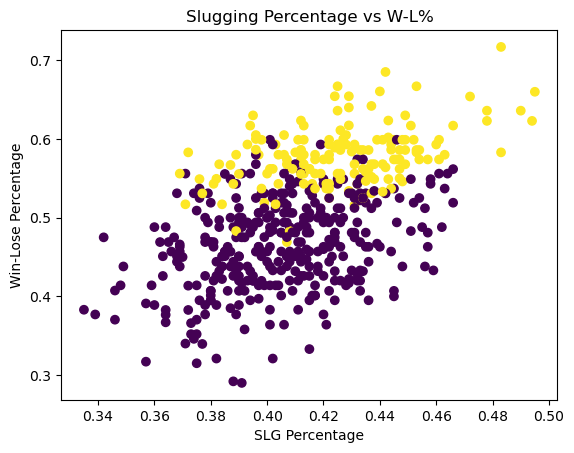

In [48]:
plt.scatter(df1["SLG"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("SLG Percentage")
plt.ylabel("Win-Lose Percentage")
plt.title("Slugging Percentage vs W-L%")
plt.show()

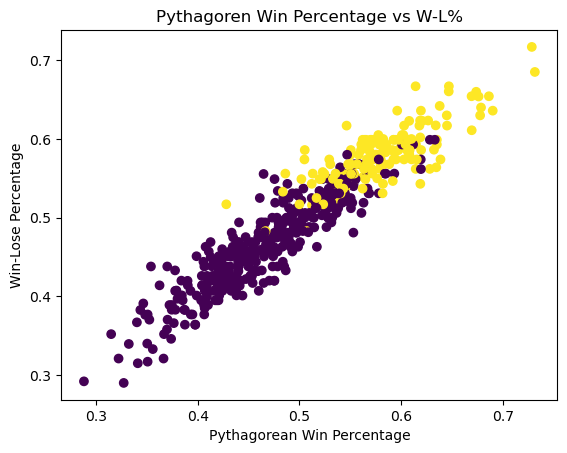

In [49]:
plt.scatter(df1["Py_Win%"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("Pythagorean Win Percentage")
plt.ylabel("Win-Lose Percentage")
plt.title("Pythagoren Win Percentage vs W-L%")
plt.show()

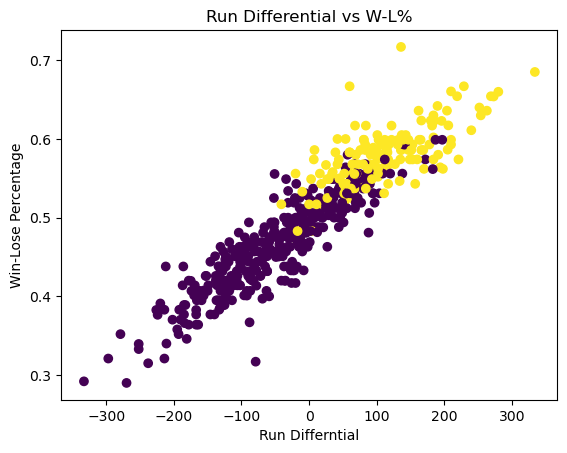

In [50]:
plt.scatter(df1["Run_Diff"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("Run Differntial")
plt.ylabel("Win-Lose Percentage")
plt.title("Run Differential vs W-L%")
plt.show()

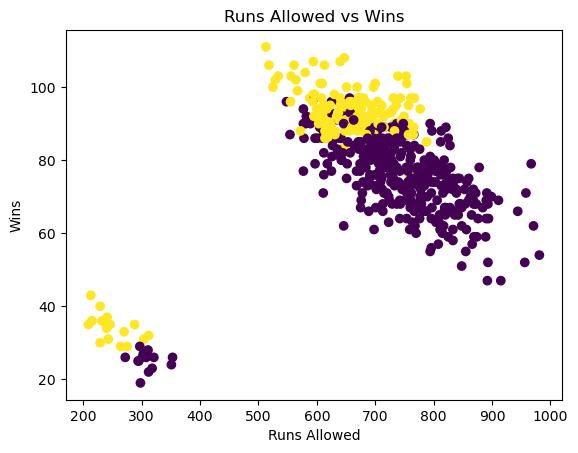

In [51]:
plt.scatter(df1["Runs Allowed"], df1["W"], c=df1["PLAYOFFS"])
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")
plt.title("Runs Allowed vs Wins")
plt.show()

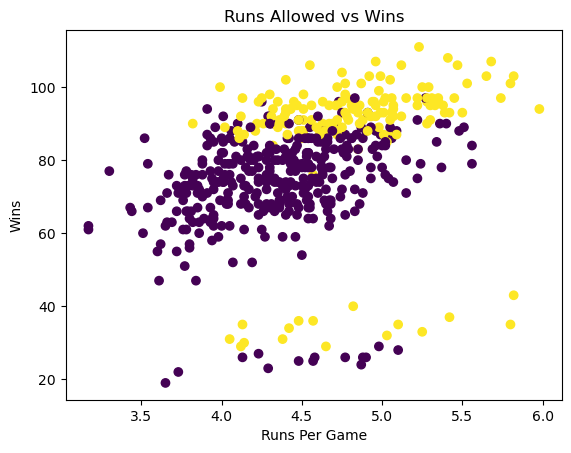

In [52]:
plt.scatter(df1["R/G"], df1["W"], c=df1["PLAYOFFS"])
plt.xlabel("Runs Per Game")
plt.ylabel("Wins")
plt.title("Runs Allowed vs Wins")
plt.show()

In [53]:
#Split The Dataset into Training and Testing Sets
inputs=df1[["SLG","OBP","wOBA","Py_Win%","Run_Diff", "R/G"]]
target=df1["PLAYOFFS"]

In [54]:
#Remove Outliers 

# plt.boxplot(df1["SLG"])
#plt.boxplot(df1["wOBA"])
#plt.boxplot(df1["Py_Win%"])
#plt.boxplot(df1["Run_Diff"])

columns =["SLG","OBP","wOBA","Py_Win%","Run_Diff", "R/G"]

for column in columns: 
    Q1=df1[column].quantile(0.25)
    Q3=df1[column].quantile(0.75)
    IQR=Q3-Q1

    upper=Q3+1.75*IQR
    lower=Q1-1.75*IQR

    df1=df1[(df1[column] >=lower) | (df1[column]<= upper)]



In [55]:
#Get The Logistic Model and GaussianNB Model and Plot the Points. 

LogReg=LogisticRegression()
GNB=GaussianNB()
BNB = BernoulliNB()
SVM=SVC()


In [56]:
X_train, X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8)
model=LogReg.fit(X_train,y_train)
# model=LogReg.fit(inputs,target)
y_pred=model.predict(X_test)

print("LogReg Score: ", accuracy_score(y_pred,y_test))

LogReg Score:  0.8333333333333334


In [57]:
X_train, X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8)
model2=GNB.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

print("GNB Score: ", accuracy_score(y_pred2,y_test))

GNB Score:  0.8529411764705882


In [58]:
X_train, X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8)
model4=SVM.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
print("SVM Score: ", accuracy_score(y_pred4,y_test))

SVM Score:  0.7843137254901961


In [59]:
# Add A Couple More Columns To df3

df3=pd.read_csv("TeamBATMLB2023.csv")
df3["Run_Diff"]=df3["Runs Scored"]-df3["Runs Allowed"]
df3.head()



,Tm,#Bat,BatAge,R/G,G,PA,AB,Runs Scored,H,2B,...,PLAYOFFS,UBB,wOBA,Runs Allowed,Py_Win%,W,L,W-L%,YEAR,Run_Diff
0,Arizona Diamondbacks,54,27.4,4.60,162,6124,5436,746,1359,274,...,1,529,0.321650,761,0.490047,84,78,0.519,2023,-15
1,Atlanta Braves,53,27.9,5.85,162,6249,5597,947,1543,293,...,1,518,0.366029,716,0.636276,104,58,0.642,2023,231
2,Baltimore Orioles,50,27.3,4.98,162,6123,5495,807,1399,309,...,1,498,0.325459,678,0.586218,101,61,0.623,2023,129
3,Boston Red Sox,56,28.6,4.77,162,6174,5562,772,1437,339,...,0,471,0.328710,776,0.497416,78,84,0.481,2023,-4
4,Chicago Cubs,48,28.4,5.06,162,6220,5504,819,1399,269,...,0,559,0.330675,723,0.562016,83,79,0.512,2023,96


In [60]:
#Apply Logistic Regression to The Present Season Dataset

inputs2=df3[["SLG","OBP", "wOBA","Py_Win%","Run_Diff", "R/G"]]
target2=df3["PLAYOFFS"]



modelFinal=model.predict(inputs2)

In [61]:
#Accuracy Score
accuracy_score(modelFinal,target2)

0.8333333333333334

In [62]:
#Print out Classification Report 
import statsmodels.api as sm